<a href="https://colab.research.google.com/github/agmalaga2020/PolicySpace2_Spanish_data/blob/main/interest_data_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### brasil

https://raw.githubusercontent.com/BAFurtado/PolicySpace2/refs/heads/master/input/interest_fixed.csv

In [2]:
import pandas as pd

# URL of the CSV file
url = "https://raw.githubusercontent.com/BAFurtado/PolicySpace2/refs/heads/master/input/interest_fixed.csv"

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(url, sep=";")  # Assuming semicolon separator

    # Display the DataFrame
    print(df)

except Exception as e:
    print(f"An error occurred: {e}")


           date  interest  mortgage
0    2000-01-01     0.002     0.004
1    2000-02-01     0.002     0.004
2    2000-03-01     0.002     0.004
3    2000-04-01     0.002     0.004
4    2000-05-01     0.002     0.004
..          ...       ...       ...
356  2029-09-01     0.002     0.004
357  2029-10-01     0.002     0.004
358  2029-11-01     0.002     0.004
359  2029-12-01     0.002     0.004
360  2030-01-01     0.002     0.004

[361 rows x 3 columns]


# Análisis e Imputación de Tasas de Interés para PolicySpace2
## Adaptación al Contexto Español (2000-2025)

[Tasas de interés](https://www.bde.es/webbe/es/estadisticas/compartido/datos/tipos/tipos-interes-1024x512.jpg)

## Índice
1. [Introducción](#introducción)
2. [Conceptos Clave](#conceptos-clave)
3. [Datos Originales y Problemática](#datos-originales-y-problemática)
4. [Metodología de Imputación](#metodología-de-imputación)
5. [Resultados de la Imputación](#resultados-de-la-imputación)
6. [Análisis Comparativo](#análisis-comparativo)
7. [Conclusiones](#conclusiones)
8. [Referencias](#referencias)

## Introducción

Este documento presenta el análisis y los resultados de la imputación de valores faltantes en tres conjuntos de datos de tasas de interés utilizados para adaptar el modelo de simulación PolicySpace2 al contexto español. Los datos cubren el período desde enero de 2000 hasta abril de 2025, proporcionando una base sólida para la simulación de dinámicas económicas en España.

La imputación de valores faltantes es un paso crucial para garantizar la integridad y continuidad de las series temporales financieras, permitiendo que el modelo funcione correctamente sin interrupciones causadas por datos incompletos.

## Conceptos Clave

### 🏦 **`interest` = Tasa base de referencia (BCE)**

- **Definición**: Representa la tasa de interés base de la economía, equivalente al tipo de interés oficial establecido por el Banco Central Europeo (BCE).
- **Impacto económico**:
  - Determina lo que los bancos pagan por depósitos
  - Influye en lo que cobran por préstamos a corto plazo
  - Afecta las decisiones de ahorro y consumo de los agentes económicos
  - Sirve como referencia para otros tipos de interés del mercado

- **En PolicySpace2**: Esta tasa determina cuánto ganan los hogares por su dinero ahorrado en el banco y afecta directamente su ingreso permanente, influyendo en sus decisiones económicas.

### 🏡 **`mortgage` = Tasa media de hipotecas (España)**

- **Definición**: Representa la tasa de interés aplicada a los préstamos hipotecarios, equivalente al interés medio al que los bancos conceden hipotecas en España.
- **Impacto económico**:
  - Define lo que pagan los hogares por las cuotas de sus hipotecas
  - Determina la capacidad de endeudamiento y compra de vivienda
  - Influye en la dinámica del mercado inmobiliario
  - Afecta la riqueza y liquidez de los hogares a largo plazo

- **En PolicySpace2**: Esta tasa define las condiciones del crédito hipotecario que las familias utilizan para comprar viviendas, afectando directamente el mercado inmobiliario simulado.

### 📊 **Relación entre ambas tasas**

En el mundo real, la tasa `mortgage` sigue generalmente la tendencia de la tasa `interest`, pero con importantes diferencias:

- Los bancos añaden un **margen o spread** sobre la tasa base del BCE para:
  - Cubrir el riesgo crediticio a largo plazo
  - Compensar costos operativos
  - Generar beneficios para la entidad financiera

- Cuando el BCE modifica su tasa de referencia, las hipotecas suelen ajustarse, pero:
  - No lo hacen al mismo ritmo
  - No en la misma magnitud
  - Con cierto retraso temporal

Esta relación dinámica se refleja en los datos históricos y es crucial para una simulación realista del sistema financiero español.


---

### 📌 **1. Interés nominal imputado**

- **Definición**: Es la tasa nominal de interés tal como se reporta por el BCE (para la base) o el Banco de España (para hipotecas), sin ajustar por inflación.
- **Origen de los datos**:
  - `interest`: serie FM.D.U2.EUR.4F.KR.MRR_FR.LEV del BCE.
  - `mortgage`: serie MIR.M.ES.B.A2C.A.R.A.2250.EUR.N del Banco de España.
- **Imputación utilizada**: método **forward fill**, rellenando los valores faltantes con el último valor conocido.
- **Uso**: refleja el coste del dinero en términos corrientes, sin tener en cuenta la pérdida de poder adquisitivo.

---

### 📌 **2. Interés real imputado**

- **Definición**: Es el interés ajustado por inflación, calculado como:

  $$
  \text{Interés real} = \text{Interés nominal} - \text{Inflación}
  $$


- **Origen de los datos**:
  - Se recalcula a partir del `interest_nominal.csv` y del índice de precios HICP de Eurostat (PRC_HICP_MIDX).
- **Imputación utilizada**: **reconstrucción directa** a partir de tasas nominales e inflación, en lugar de rellenar los valores faltantes con interpolaciones.
- **Uso**: permite estimar el rendimiento real del dinero, es decir, cuánto ganan (o pierden) los hogares ajustado al coste de vida.

---

### ⚖️ Diferencia clave

| Concepto                  | Interés Nominal                   | Interés Real                            |
|---------------------------|-----------------------------------|------------------------------------------|
| ¿Ajustado por inflación?  | ❌ No                             | ✅ Sí                                    |
| Fuente base               | BCE y BdE                        | BCE/BdE + Eurostat (HICP)               |
| Método de imputación      | Forward fill (propagación)        | Recalculado desde nominal e inflación   |
| Interpretación económica  | Costo/rendimiento nominal del dinero | Costo/rendimiento en poder adquisitivo real |
| Variabilidad              | Menor                            | Mayor (porque depende de la inflación)  |

---




## Datos Originales y Problemática

### Fuentes de Datos

Los datos utilizados provienen de tres fuentes principales:

1. **Banco Central Europeo (BCE)**: Serie FM.D.U2.EUR.4F.KR.MRR_FR.LEV para el tipo de interés oficial.
2. **Banco de España**: Serie MIR.M.ES.B.A2C.A.R.A.2250.EUR.N para el tipo medio de hipotecas.
3. **Eurostat**: Índice HICP all-items (PRC_HICP_MIDX) para calcular tasas reales.

### Análisis de Valores Faltantes

El análisis inicial reveló la siguiente distribución de valores faltantes:

| Dataset | Variable | Valores NaN | Porcentaje |
|---------|----------|-------------|------------|
| interest_fixed.csv | interest | 0 | 0.00% |
| interest_fixed.csv | mortgage | 0 | 0.00% |
| interest_nominal.csv | interest | 99 | 32.57% |
| interest_nominal.csv | mortgage | 2 | 0.66% |
| interest_real.csv | interest | 101 | 33.22% |
| interest_real.csv | mortgage | 3 | 0.99% |

La alta proporción de valores faltantes, especialmente en la variable `interest`, representa un desafío significativo para la integridad de los datos y la fiabilidad del modelo de simulación.

### Patrones Temporales Identificados

El análisis de patrones temporales reveló características importantes que informaron la estrategia de imputación:

1. **Alta autocorrelación**: Los valores de tasas de interés muestran una fuerte correlación con sus valores previos, especialmente en intervalos cortos (lag=1).

2. **Estabilidad por períodos**: Las tasas tienden a mantenerse estables durante períodos prolongados, especialmente durante la política monetaria constante del BCE.

3. **Ausencia de estacionalidad mensual significativa**: El ratio de varianza entre meses respecto a la varianza total fue de 0.003749, indicando que no hay evidencia fuerte de patrones estacionales mensuales.

4. **Tendencia a largo plazo**: Aunque no se detectó una correlación estadísticamente significativa entre años y valores medios (correlación = -0.0654, p-value = 0.7903), visualmente se observan períodos de tendencia clara (bajista 2008-2016, alcista 2022-2024).

## Metodología de Imputación

Basándonos en el análisis de los datos y sus características temporales, se diseñaron estrategias específicas para cada conjunto de datos:

### Para interest_fixed.csv

- **Naturaleza de los datos**: Este dataset contiene valores **intencionalmente constantes** (0.004167) para todas las fechas en ambas columnas (`interest` y `mortgage`).
- **Diseño**: Representa una tasa fija anual del 5% convertida a mensual (0.05/12 = 0.004167).
- **Propósito**: Sirve como escenario base con tasas de interés constantes para comparar con los escenarios de tasas variables.
- **Procesamiento**: No requirió imputación ya que todos los valores son idénticos por diseño, no por ausencia de valores faltantes.

### Para interest_nominal.csv

- **Estrategia para `interest`**: Método **forward fill** (propagación hacia adelante).
- **Justificación**: La alta autocorrelación y la tendencia a mantener valores estables por períodos prolongados hacen que el último valor conocido sea un buen predictor del siguiente.

- **Estrategia para `mortgage`**: Método **forward fill**.
- **Justificación**: Similar a `interest`, los tipos hipotecarios muestran estabilidad temporal y cambios graduales.

### Para interest_real.csv

- **Estrategia para `interest`**: **Recálculo** a partir de interest_nominal e inflación.
- **Justificación**: Al ser tasas reales derivadas de las nominales menos la inflación, es más preciso y coherente recalcularlas que imputarlas directamente.

- **Estrategia para `mortgage`**: **Recálculo** a partir de mortgage_nominal e inflación.
- **Justificación**: Mantiene la coherencia económica entre tasas nominales y reales, preservando la relación fundamental entre ambas.

## Resultados de la Imputación

### Estadísticas Descriptivas Post-Imputación

#### interest_fixed.csv
| Estadística | interest | mortgage |
|-------------|----------|----------|
| Count | 304.0000 | 304.0000 |
| Mean | 0.004167 | 0.004167 |
| Std | 0.0000 | 0.0000 |
| Min | 0.004167 | 0.004167 |
| Max | 0.004167 | 0.004167 |

*Nota: Todos los valores en interest_fixed.csv son idénticos por diseño, representando una tasa fija del 5% anual (0.004167 mensual).*

#### interest_nominal_imputado.csv

| Estadística | interest | mortgage |
|-------------|----------|----------|
| Count | 304.0000 | 304.0000 |
| Mean | 0.0207 | 0.0328 |
| Std | 0.0190 | 0.0130 |
| Min | 0.0000 | 0.0138 |
| 25% | 0.0004 | 0.0209 |
| 50% | 0.0112 | 0.0314 |
| 75% | 0.0425 | 0.0386 |
| Max | 0.0450 | 0.0640 |

#### interest_real_imputado.csv

| Estadística | interest | mortgage |
|-------------|----------|----------|
| Count | 302.0000 | 302.0000 |
| Mean | 0.0188 | 0.0310 |
| Std | 0.0195 | 0.0139 |
| Min | -0.0243 | -0.0089 |
| 25% | 0.0003 | 0.0202 |
| 50% | 0.0125 | 0.0295 |
| 75% | 0.0392 | 0.0391 |
| Max | 0.0505 | 0.0683 |

### Efectividad de la Imputación

La imputación fue altamente efectiva:

- **interest_fixed.csv**: No requirió imputación ya que todos los valores son constantes por diseño.
- **interest_nominal.csv**: Se imputaron exitosamente todos los valores faltantes (99 en `interest` y 2 en `mortgage`).
- **interest_real.csv**: Se imputaron la mayoría de los valores faltantes, quedando solo 2 valores NaN que no pudieron ser recalculados debido a la falta de datos de inflación correspondientes.

### Validación de Coherencia

Se realizaron varias pruebas para validar la coherencia de los valores imputados:

1. **Análisis de rango**: Los valores imputados se mantienen dentro de los rangos históricos esperados.
   - interest_nominal: [0.0000, 0.0450]
   - mortgage_nominal: [0.0138, 0.0640]
   - interest_real: [-0.0243, 0.0505]
   - mortgage_real: [-0.0089, 0.0683]

2. **Detección de anomalías**: Se identificaron solo 4 posibles anomalías (cambios bruscos) en la serie `interest` de interest_nominal.csv, correspondientes a cambios reales en la política monetaria del BCE.

3. **Preservación de relaciones económicas**: La relación entre tasas nominales y reales se mantiene consistente, con las tasas reales generalmente inferiores a las nominales debido al efecto de la inflación.

### Visualización de Resultados

#### Comparación de `interest` en interest_nominal.csv

![Comparación de interest en interest_nominal.csv](https://private-us-east-1.manuscdn.com/sessionFile/DjghyxboDgtGTClMZ2CjXh/sandbox/V4DaxEE9crGQDYVuOh2RMX-images_1744911103117_na1fn_L2hvbWUvdWJ1bnR1L2NvbXBhcmFjaW9uX2ludGVyZXN0X25vbWluYWw.png?Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9wcml2YXRlLXVzLWVhc3QtMS5tYW51c2Nkbi5jb20vc2Vzc2lvbkZpbGUvRGpnaHl4Ym9EZ3RHVENsTVoyQ2pYaC9zYW5kYm94L1Y0RGF4RUU5Y3JHUURZVnVPaDJSTVgtaW1hZ2VzXzE3NDQ5MTExMDMxMTdfbmExZm5fTDJodmJXVXZkV0oxYm5SMUwyTnZiWEJoY21GamFXOXVYMmx1ZEdWeVpYTjBYMjV2YldsdVlXdy5wbmciLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3NjcyMjU2MDB9fX1dfQ__&Key-Pair-Id=K2HSFNDJXOU9YS&Signature=pF360f19Z0AdSJJ1vrx4fDIRrq0Bro04Bjm6NBWJpTQcC86y-iAiGfPN-3Pq3bg9PQXpVqXafwRPnRl24DuPdL3mnYri05KfV7EBKjjo4uf-ni-fUtTNmLFzcQAlOA4CuN65cvXNtnrvt9dJs15g5VasvH1l1KOe8BKSKZ76O6jcNjqe2OUCdtSx-7JRFS~C3BPUX1Cv8Eu8uT~Ver201wt2piwRLzvrc~jyXUCu1dTCjG9Wa2T~H8EgMFPAXkDyKf1u9unZXDO-O3oAVoRsJwyVpREk0YqX8ag4zg9Lgb3Ayl-LGtvQyrYkf7B3NwCVnbuMM-yJMPMmsPGSbMKoAQ__)

*Figura 1: Comparación entre valores originales (línea azul) e imputados (línea roja punteada) para la tasa de interés base. Se observa cómo la imputación mediante forward fill mantiene la tendencia y estabilidad de los tipos de interés, especialmente en el período 2000-2008.*

#### Comparación de `mortgage` en interest_nominal.csv

![Comparación de mortgage en interest_nominal.csv](https://private-us-east-1.manuscdn.com/sessionFile/DjghyxboDgtGTClMZ2CjXh/sandbox/V4DaxEE9crGQDYVuOh2RMX-images_1744911103117_na1fn_L2hvbWUvdWJ1bnR1L2NvbXBhcmFjaW9uX21vcnRnYWdlX25vbWluYWw.png?Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9wcml2YXRlLXVzLWVhc3QtMS5tYW51c2Nkbi5jb20vc2Vzc2lvbkZpbGUvRGpnaHl4Ym9EZ3RHVENsTVoyQ2pYaC9zYW5kYm94L1Y0RGF4RUU5Y3JHUURZVnVPaDJSTVgtaW1hZ2VzXzE3NDQ5MTExMDMxMTdfbmExZm5fTDJodmJXVXZkV0oxYm5SMUwyTnZiWEJoY21GamFXOXVYMjF2Y25SbllXZGxYMjV2YldsdVlXdy5wbmciLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3NjcyMjU2MDB9fX1dfQ__&Key-Pair-Id=K2HSFNDJXOU9YS&Signature=nkimcOdMuI7CRBzbKqLWI68yFdiJKpA5hV7rTTRX~xilTccBlJLrCtj5Ij8xB8Upyf5VxS3zfJovFNa0npEYg8V4ha92apakv~fiTwzz19leo2mpywmTVaCH0WWRv-LPbjOoQP4FL~psWV52pLvpYPgqEIK60XC9oRdlb98oOBCPDOGFq7rAnhn61xuotO-vnuUit6Sbk6~tnTlxbMS-U8U~QgdIp5EZO~UbmzYAg5mvIxyg4m1PTOeVfdj-kSsS3~v0fvUVYzJULc88SAzaS0c6G2fiSfkhbqmy5ioNV0pfh8HLLlTVqhu3Qu1jB8qifCF-6AlKPgiNI~28mzTw6A__)

*Figura 2: Comparación entre valores originales e imputados para la tasa hipotecaria. La imputación es casi imperceptible debido al bajo porcentaje de valores faltantes (0.66%).*

#### Comparación de `interest` en interest_real.csv

![Comparación de interest en interest_real.csv](https://private-us-east-1.manuscdn.com/sessionFile/DjghyxboDgtGTClMZ2CjXh/sandbox/V4DaxEE9crGQDYVuOh2RMX-images_1744911103117_na1fn_L2hvbWUvdWJ1bnR1L2NvbXBhcmFjaW9uX2ludGVyZXN0X3JlYWw.png?Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9wcml2YXRlLXVzLWVhc3QtMS5tYW51c2Nkbi5jb20vc2Vzc2lvbkZpbGUvRGpnaHl4Ym9EZ3RHVENsTVoyQ2pYaC9zYW5kYm94L1Y0RGF4RUU5Y3JHUURZVnVPaDJSTVgtaW1hZ2VzXzE3NDQ5MTExMDMxMTdfbmExZm5fTDJodmJXVXZkV0oxYm5SMUwyTnZiWEJoY21GamFXOXVYMmx1ZEdWeVpYTjBYM0psWVd3LnBuZyIsIkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc2NzIyNTYwMH19fV19&Key-Pair-Id=K2HSFNDJXOU9YS&Signature=rYa0CoLs0wAMRQM2mIag~QdSOHg-4uS2YOImBZIaYc5kHWpF9uFHI4MFHq3ELbzncE-VhTX9kuw2t2k9F-Q5OKs8ny7dMaVj8Avu0Q968Ti0lYAqoKCBHKZpcGKK4stEvTb2SHKUkJbcmuv3tj7o-pmicwvllafVNtKAreefDk~5p3t5AksInrUKa1cv582odC226GwkNizJzhv1z2PiJdArEESG753BnzVOh7n2HmW5TyygX-GAX7js9heAuD1G6V7Lo59NQFWctKOmF37EjGMc-n8d9TYKbTf5JCa~AUUgB28yCOG3eITufQNleEe3ZDVanwleX6lmyYbjSmuj4g__)

*Figura 3: Comparación entre valores originales e imputados para la tasa de interés real. El recálculo preserva la volatilidad característica de las tasas reales, que incluyen el efecto de la inflación.*

#### Comparación de `mortgage` en interest_real.csv

![Comparación de mortgage en interest_real.csv](https://private-us-east-1.manuscdn.com/sessionFile/DjghyxboDgtGTClMZ2CjXh/sandbox/V4DaxEE9crGQDYVuOh2RMX-images_1744911103117_na1fn_L2hvbWUvdWJ1bnR1L2NvbXBhcmFjaW9uX21vcnRnYWdlX3JlYWw.png?Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9wcml2YXRlLXVzLWVhc3QtMS5tYW51c2Nkbi5jb20vc2Vzc2lvbkZpbGUvRGpnaHl4Ym9EZ3RHVENsTVoyQ2pYaC9zYW5kYm94L1Y0RGF4RUU5Y3JHUURZVnVPaDJSTVgtaW1hZ2VzXzE3NDQ5MTExMDMxMTdfbmExZm5fTDJodmJXVXZkV0oxYm5SMUwyTnZiWEJoY21GamFXOXVYMjF2Y25SbllXZGxYM0psWVd3LnBuZyIsIkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc2NzIyNTYwMH19fV19&Key-Pair-Id=K2HSFNDJXOU9YS&Signature=QOB~jIlkBPIfXpj9cy571tfq53ETIjvJq62r48QmOsJ5ZJ2e8QzWmIsa8nveX9kQ~G9gunUkN1itKH1FWvdUx3ecgsoRq7A-bEWqY9KDaSmwk7vb0Bg7gIkght-7sjqEHC2N~X0VM-Dkb1C1dVV6PYoQUafyiW7xJ5aMCWK4TDwGpXLy8pg16GkshTw6Ky9OlZK4NvT~xXv2JD6r2c8tLOd9L45HuOOf1TaP0YvBtFbbQHcMiCTwctgSrV0E1iZ4nMf44SAbS3LSs1uCaBKBrxn56Vm817AUa4Bo~r5E5gMb4Z-N7d~gutdlgMiE7~sS0S5brSdc7aX7RF~Jpx6zkw__)

*Figura 4: Comparación entre valores originales e imputados para la tasa hipotecaria real. Se mantiene la coherencia con las tasas nominales, ajustadas por el efecto de la inflación.*

## Análisis Comparativo

### Evolución Histórica de las Tasas

La evolución de las tasas de interés en el período 2000-2025 muestra patrones históricos importantes:

1. **2000-2008**: Período de tasas relativamente altas y estables.
2. **2008-2009**: Caída brusca tras la crisis financiera global.
3. **2009-2016**: Descenso gradual hasta alcanzar niveles cercanos a cero.
4. **2016-2022**: Período prolongado de tasas ultra-bajas (política monetaria expansiva).
5. **2022-2024**: Incremento rápido para combatir la inflación post-pandemia.
6. **2024-2025**: Inicio de un ciclo de reducción gradual.

### Comparación entre Tasas Nominales y Reales

Las tasas reales muestran mayor volatilidad que las nominales debido a la influencia de la inflación:

- **Períodos de inflación alta**: Las tasas reales pueden llegar a ser negativas, como se observa en algunos puntos de 2022-2023.
- **Períodos de estabilidad de precios**: Las tasas reales se aproximan a las nominales.

### Comparación con Tasas Fijas

El dataset interest_fixed.csv proporciona un escenario de referencia con tasas constantes (5% anual):

- Durante 2000-2008 y 2022-2024, las tasas nominales variables superaron a la tasa fija de referencia.
- Durante 2009-2022, la tasa fija de referencia fue considerablemente mayor que las tasas variables, reflejando el período de política monetaria ultra-expansiva.
- Esta comparación permite evaluar el impacto de diferentes regímenes de tasas de interés en el modelo.

### Spread entre `interest` y `mortgage`

El diferencial entre la tasa base (`interest`) y la tasa hipotecaria (`mortgage`) ha variado significativamente:

- **Spread medio**: 1.21 puntos porcentuales
- **Spread mínimo**: 0.24 puntos porcentuales (2008)
- **Spread máximo**: 2.15 puntos porcentuales (2020)

Este spread refleja las condiciones del mercado crediticio español y la percepción de riesgo de los bancos en diferentes períodos económicos.

## Conclusiones

1. **Efectividad de la imputación**: Las estrategias implementadas han permitido completar las series temporales manteniendo la coherencia económica y estadística de los datos.

2. **Preservación de patrones históricos**: Los datos imputados mantienen fielmente los patrones históricos de las tasas de interés en España, reflejando tanto períodos de estabilidad como de cambio.

3. **Múltiples escenarios de tasas**: La combinación de tasas fijas (interest_fixed.csv) y variables (interest_nominal.csv e interest_real.csv) proporciona diferentes escenarios para evaluar el comportamiento del modelo bajo distintos regímenes de política monetaria.

4. **Idoneidad para PolicySpace2**: Los conjuntos de datos resultantes proporcionan una base sólida para la simulación del sistema financiero español en el modelo PolicySpace2, capturando adecuadamente:
   - La evolución de la política monetaria del BCE
   - Las condiciones del mercado hipotecario español
   - La relación entre tasas nominales y reales

5. **Limitaciones**: Persisten 2 valores faltantes en interest_real.csv que no pudieron ser imputados, aunque esto representa menos del 1% de los datos y no debería afectar significativamente el rendimiento del modelo.

## Referencias

1. Banco Central Europeo. (2025). *Statistical Data Warehouse*. Serie FM.D.U2.EUR.4F.KR.MRR_FR.LEV.
   https://data.ecb.europa.eu/data/datasets/FM/FM.D.U2.EUR.4F.KR.MRR_FR.LEV

2. Banco de España. (2025). *Estadísticas de tipos de interés*. Serie MIR.M.ES.B.A2C.A.R.A.2250.EUR.N.
   https://www.bde.es/webbe/es/estadisticas/temas/tipos-interes.html

3. Eurostat. (2025). *HICP - monthly data (index)*. Serie PRC_HICP_MIDX.
   https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_midx

4. Furtado, B. A. (2018). *PolicySpace2: Modeling Markets and Endogenous Public Policies*.
   https://github.com/BAFurtado/policyspace2

5. Little, R. J. A., & Rubin, D. B. (2019). *Statistical Analysis with Missing Data*. John Wiley & Sons.

---

*Documento preparado para la adaptación del modelo PolicySpace2 al contexto español.*
*Última actualización: Abril 2025*


### España





### ecb_interest_rates

In [71]:
"""
Obtención de datos de tasas de interés del BCE
Obtiene la serie FM.D.U2.EUR.4F.KR.MRR_FR.LEV (tipo de interés oficial del BCE)
y la convierte a formato mensual
"""

import requests
import pandas as pd
from io import StringIO
import os
from datetime import datetime

def fetch_ecb_interest_rates():
    """
    Descarga la serie de tipos de interés oficiales del BCE (operaciones principales de refinanciación)
    y la convierte a formato mensual
    """
    # Parámetros para la petición a la API del BCE
    flow = 'FM'
    key = 'D.U2.EUR.4F.KR.MRR_FR.LEV'  # Serie diaria
    start_period = '2000-01-01'
    end_period = '2025-04-30'

    # URL base y parámetros para la API SDMX del BCE
    base_url = 'https://sdw-wsrest.ecb.europa.eu/service/data'
    url = f"{base_url}/{flow}/{key}"
    params = {
        'startPeriod': start_period,
        'endPeriod': end_period,
        'format': 'csvdata'
    }

    print(f"Solicitando datos del BCE: {url}")
    print(f"Parámetros: {params}")

    try:
        # Realizar la petición a la API
        response = requests.get(url, params=params)
        response.raise_for_status()

        # Procesar los datos recibidos
        df = pd.read_csv(StringIO(response.text), parse_dates=['TIME_PERIOD'])

        # Guardar datos diarios para referencia
        df.rename(columns={'TIME_PERIOD': 'date', 'OBS_VALUE': 'interest'}, inplace=True)

        # Create 'data' directory if it doesn't exist
        os.makedirs('data', exist_ok=True) #This will create a directory called "data" if it is not present

        daily_output_path = os.path.join('data', 'ecb_interest_daily.csv')
        df.to_csv(daily_output_path, sep=';', index=False)
        print(f"Datos diarios guardados en: {daily_output_path}")

        # Convertir a formato mensual (último valor de cada mes)
        df_monthly = df.copy()
        df_monthly.set_index('date', inplace=True)
        df_monthly = df_monthly.resample('M').last().reset_index()

        # Formatear fecha a YYYY-MM
        df_monthly['date'] = df_monthly['date'].dt.strftime('%Y-%m')

        # Convertir valores a decimal (dividir por 100 si están en porcentaje)
        if df_monthly['interest'].max() > 1:
            df_monthly['interest'] = df_monthly['interest'] / 100
            print("Valores convertidos de porcentaje a decimal")

        # Guardar datos mensuales
        monthly_output_path = os.path.join('data', 'ecb_interest_monthly.csv')
        df_monthly.to_csv(monthly_output_path, sep=';', index=False)

        print(f"Datos mensuales guardados en: {monthly_output_path}")
        print(f"Período cubierto: {df_monthly['date'].min()} a {df_monthly['date'].max()}")
        print(f"Total de registros mensuales: {len(df_monthly)}")

        # Mostrar primeras filas para verificación
        print("\nPrimeras filas de datos mensuales:")
        print(df_monthly.head().to_string(index=False))

        return df_monthly

    except requests.exceptions.RequestException as e:
        print(f"Error al obtener datos del BCE: {e}")
        return None

if __name__ == "__main__":
    fetch_ecb_interest_rates()

Solicitando datos del BCE: https://sdw-wsrest.ecb.europa.eu/service/data/FM/D.U2.EUR.4F.KR.MRR_FR.LEV
Parámetros: {'startPeriod': '2000-01-01', 'endPeriod': '2025-04-30', 'format': 'csvdata'}
Datos diarios guardados en: data/ecb_interest_daily.csv
Valores convertidos de porcentaje a decimal
Datos mensuales guardados en: data/ecb_interest_monthly.csv
Período cubierto: 2000-01 a 2025-04
Total de registros mensuales: 304

Primeras filas de datos mensuales:
   date                          KEY FREQ REF_AREA CURRENCY PROVIDER_FM INSTRUMENT_FM PROVIDER_FM_ID DATA_TYPE_FM  interest OBS_STATUS OBS_CONF  OBS_PRE_BREAK  OBS_COM TIME_FORMAT  BREAKS COLLECTION  COMPILING_ORG  DISS_ORG  DOM_SER_IDS  FM_CONTRACT_TIME  FM_COUPON_RATE  FM_IDENTIFIER  FM_LOT_SIZE  FM_MATURITY  FM_OUTS_AMOUNT  FM_PUT_CALL  FM_STRIKE_PRICE  PUBL_MU  PUBL_PUBLIC  UNIT_INDEX_BASE  COMPILATION  COVERAGE  DECIMALS  SOURCE_AGENCY  SOURCE_PUB                                                                                   TIT

<ipython-input-71-da2fc283cbb4>:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_monthly.resample('M').last().reset_index()


### bde_mortgage_rates

In [72]:
"""
Obtención de datos de tasas hipotecarias del Banco de España
Obtiene la serie TEDR hipotecario para España
"""

import requests
import pandas as pd
from io import StringIO
import os
from datetime import datetime

def fetch_bde_mortgage_rates():
    """
    Descarga la serie de tipos de interés hipotecarios (TEDR) del Banco de España

    Nota: Basado en la investigación, utilizamos la serie MIR.M.ES.B.A2C.A.R.A.2250.EUR.N
    que corresponde a los tipos de interés de nuevos préstamos para vivienda en España
    """
    # Parámetros para la petición a la API del Banco de España (a través del BCE)
    flow = 'MIR'
    key = 'M.ES.B.A2C.A.R.A.2250.EUR.N'  # Serie mensual para hipotecas en España
    start_period = '2000-01'
    end_period = '2025-04'

    # URL base y parámetros para la API SDMX del BCE
    base_url = 'https://sdw-wsrest.ecb.europa.eu/service/data'
    url = f"{base_url}/{flow}/{key}"
    params = {
        'startPeriod': start_period,
        'endPeriod': end_period,
        'format': 'csvdata'
    }

    print(f"Solicitando datos del Banco de España (vía BCE): {url}")
    print(f"Parámetros: {params}")

    try:
        # Realizar la petición a la API
        response = requests.get(url, params=params)
        response.raise_for_status()

        # Procesar los datos recibidos
        df = pd.read_csv(StringIO(response.text), parse_dates=['TIME_PERIOD'])

        # Renombrar columnas y formatear fecha
        df.rename(columns={'TIME_PERIOD': 'date', 'OBS_VALUE': 'mortgage'}, inplace=True)
        df['date'] = df['date'].dt.strftime('%Y-%m')

        # Convertir valores a decimal (dividir por 100 si están en porcentaje)
        if df['mortgage'].max() > 1:
            df['mortgage'] = df['mortgage'] / 100
            print("Valores convertidos de porcentaje a decimal")

        # Guardar datos mensuales
        output_path = os.path.join('data', 'bde_mortgage_monthly.csv')
        df.to_csv(output_path, sep=';', index=False)

        print(f"Datos guardados en: {output_path}")
        print(f"Período cubierto: {df['date'].min()} a {df['date'].max()}")
        print(f"Total de registros mensuales: {len(df)}")

        # Mostrar primeras filas para verificación
        print("\nPrimeras filas:")
        print(df.head().to_string(index=False))

        return df

    except requests.exceptions.RequestException as e:
        print(f"Error al obtener datos del Banco de España: {e}")
        return None

if __name__ == "__main__":
    fetch_bde_mortgage_rates()


Solicitando datos del Banco de España (vía BCE): https://sdw-wsrest.ecb.europa.eu/service/data/MIR/M.ES.B.A2C.A.R.A.2250.EUR.N
Parámetros: {'startPeriod': '2000-01', 'endPeriod': '2025-04', 'format': 'csvdata'}
Valores convertidos de porcentaje a decimal
Datos guardados en: data/bde_mortgage_monthly.csv
Período cubierto: 2000-01 a 2025-02
Total de registros mensuales: 302

Primeras filas:
                            KEY FREQ REF_AREA BS_REP_SECTOR BS_ITEM MATURITY_NOT_IRATE DATA_TYPE_MIR AMOUNT_CAT  BS_COUNT_SECTOR CURRENCY_TRANS IR_BUS_COV    date  mortgage OBS_STATUS OBS_CONF  OBS_PRE_BREAK  OBS_COM TIME_FORMAT  BREAKS COLLECTION  COMPILING_ORG  DISS_ORG  DOM_SER_IDS  PUBL_ECB  PUBL_MU  PUBL_PUBLIC  UNIT_INDEX_BASE  COMPILATION  COVERAGE  DECIMALS  NAT_TITLE SOURCE_AGENCY                                                                               TITLE                                                                                                                                    

eurosat_hicp

In [74]:
"""
Obtención de datos de inflación de Eurostat
Obtiene el índice HICP all-items (PRC_HICP_MIDX) y calcula la tasa intermensual
"""

import requests
import pandas as pd
import os
from datetime import datetime
import time

def fetch_eurostat_hicp():
    """
    Descarga el índice HICP all-items de Eurostat y calcula la tasa intermensual

    Nota: Utilizamos la API de Eurostat para obtener el índice HICP (PRC_HICP_MIDX)
    y luego calculamos la tasa intermensual como (valor_actual / valor_anterior - 1)
    """
    # URL base para la API de Eurostat
    base_url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data"

    # Parámetros para la petición
    # PRC_HICP_MIDX: HICP - monthly data (index)
    # CP00: All-items HICP
    # EA: Euro area
    dataset = "prc_hicp_midx"
    params = {
        "format": "JSON",
        "lang": "EN",
        "coicop": "CP00",  # All-items HICP
        "geo": "EA",       # Euro area
        "unit": "I15",     # Index 2015=100
        "startPeriod": "2000-01",
        "endPeriod": "2025-04"
    }

    url = f"{base_url}/{dataset}"

    print(f"Solicitando datos de Eurostat: {url}")
    print(f"Parámetros: {params}")

    try:
        # Realizar la petición a la API
        response = requests.get(url, params=params)
        response.raise_for_status()

        # Procesar los datos recibidos
        data = response.json()

        # Extraer los valores y fechas
        values = data.get('value', {})
        dimensions = data.get('dimension', {})
        time_dimension = dimensions.get('time', {})
        time_values = time_dimension.get('category', {}).get('index', {})

        # Crear lista de datos
        rows = []
        for time_key, time_index in time_values.items():
            value_key = str(time_index)
            if value_key in values:
                rows.append({
                    'date': time_key,
                    'hicp_index': values[value_key]
                })

        # Crear DataFrame
        df = pd.DataFrame(rows)

        # Ordenar por fecha
        df['date_obj'] = pd.to_datetime(df['date'], format='%Y-%m')
        df = df.sort_values('date_obj')

        # Calcular la tasa intermensual
        df['hicp_rate'] = df['hicp_index'].pct_change()

        # Eliminar la columna auxiliar y formatear fecha
        df = df.drop('date_obj', axis=1)

        # Guardar datos
        output_path = os.path.join('data', 'eurostat_hicp_monthly.csv')
        df.to_csv(output_path, sep=';', index=False)

        print(f"Datos guardados en: {output_path}")
        print(f"Período cubierto: {df['date'].min()} a {df['date'].max()}")
        print(f"Total de registros mensuales: {len(df)}")

        # Mostrar primeras filas para verificación
        print("\nPrimeras filas:")
        print(df.head().to_string(index=False))

        return df

    except requests.exceptions.RequestException as e:
        print(f"Error al obtener datos de Eurostat: {e}")

        # Intentar método alternativo con la biblioteca eurostat si está disponible
        try:
            print("Intentando método alternativo con la biblioteca eurostat...")
            import eurostat

            # Obtener datos con la biblioteca eurostat
            data = eurostat.get_data_df('prc_hicp_midx',
                                       filter_pars={'coicop': 'CP00', 'geo': 'EA', 'unit': 'I15'},
                                       start_period='2000-01',
                                       end_period='2025-04')

            # Procesar los datos
            df = data.reset_index()
            df = df.rename(columns={'time': 'date', 'values': 'hicp_index'})

            # Ordenar por fecha
            df['date_obj'] = pd.to_datetime(df['date'], format='%Y-%m')
            df = df.sort_values('date_obj')

            # Calcular la tasa intermensual
            df['hicp_rate'] = df['hicp_index'].pct_change()

            # Eliminar la columna auxiliar y formatear fecha
            df = df.drop('date_obj', axis=1)

            # Guardar datos
            output_path = os.path.join('data', 'eurostat_hicp_monthly.csv')
            df.to_csv(output_path, sep=';', index=False)

            print(f"Datos guardados en: {output_path}")
            print(f"Período cubierto: {df['date'].min()} a {df['date'].max()}")
            print(f"Total de registros mensuales: {len(df)}")

            # Mostrar primeras filas para verificación
            print("\nPrimeras filas:")
            print(df.head().to_string(index=False))

            return df

        except Exception as e2:
            print(f"Error con el método alternativo: {e2}")

            # Crear datos simulados como último recurso
            print("Creando datos simulados como último recurso...")

            # Crear rango de fechas
            start_date = '2000-01'
            end_date = '2025-04'
            dates = pd.date_range(start=start_date, end=end_date, freq='MS')
            formatted_dates = [date.strftime('%Y-%m') for date in dates]

            # Crear DataFrame con datos simulados
            # Usamos una tasa de inflación mensual promedio del 0.2%
            df = pd.DataFrame({
                'date': formatted_dates,
                'hicp_index': [100 * (1.002 ** i) for i in range(len(formatted_dates))],
                'hicp_rate': [0.002] * len(formatted_dates)
            })

            # Guardar datos
            output_path = os.path.join('data', 'eurostat_hicp_monthly_simulated.csv')
            df.to_csv(output_path, sep=';', index=False)

            print(f"Datos simulados guardados en: {output_path}")
            print(f"ADVERTENCIA: Estos son datos simulados, no reales")

            return df

if __name__ == "__main__":
    fetch_eurostat_hicp()


Solicitando datos de Eurostat: https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/prc_hicp_midx
Parámetros: {'format': 'JSON', 'lang': 'EN', 'coicop': 'CP00', 'geo': 'EA', 'unit': 'I15', 'startPeriod': '2000-01', 'endPeriod': '2025-04'}
Datos guardados en: data/eurostat_hicp_monthly.csv
Período cubierto: 2000-01 a 2025-03
Total de registros mensuales: 303

Primeras filas:
   date  hicp_index  hicp_rate
2000-01       75.13        NaN
2000-02       75.37   0.003194
2000-03       75.60   0.003052
2000-04       75.67   0.000926
2000-05       75.76   0.001189


### create_final_csv

In [75]:
"""
Procesamiento de datos y creación de archivos CSV finales
Combina los datos obtenidos para crear los tres archivos CSV requeridos:
- interest_fixed.csv
- interest_nominal.csv
- interest_real.csv
"""

import pandas as pd
import os
from datetime import datetime

def create_final_csv_files():
    """
    Procesa los datos obtenidos y crea los tres archivos CSV finales
    según los requisitos especificados
    """
    print("Iniciando procesamiento de datos y creación de archivos CSV finales...")

    # Directorio de datos y resultados
    data_dir = 'data'
    output_dir = '.'

    # 1. interest_fixed.csv - Ya está creado, solo verificamos
    fixed_path = os.path.join(data_dir, 'interest_fixed.csv')
    if os.path.exists(fixed_path):
        print(f"El archivo {fixed_path} ya existe")
        df_fixed = pd.read_csv(fixed_path, sep=';')
        print(f"Contiene {len(df_fixed)} registros")
    else:
        print(f"ADVERTENCIA: No se encontró {fixed_path}, se creará nuevamente")
        # Crear rango de fechas mensuales desde 2000-01 hasta 2025-04
        start_date = '2000-01'
        end_date = '2025-04'
        dates = pd.date_range(start=start_date, end=end_date, freq='MS')
        formatted_dates = [date.strftime('%Y-%m') for date in dates]

        # Crear DataFrame con las columnas requeridas
        df_fixed = pd.DataFrame({
            'date': formatted_dates,
            'interest': [0.004167] * len(formatted_dates),
            'mortgage': [0.004167] * len(formatted_dates)
        })

        # Guardar a CSV con separador punto y coma
        df_fixed.to_csv(fixed_path, sep=';', index=False)
        print(f"Archivo generado: {fixed_path}")

    # 2. interest_nominal.csv - Combinar datos del BCE y Banco de España
    print("\nCreando interest_nominal.csv...")

    # Cargar datos del BCE (tipo de interés oficial)
    ecb_path = os.path.join(data_dir, 'ecb_interest_monthly.csv')
    if os.path.exists(ecb_path):
        df_ecb = pd.read_csv(ecb_path, sep=';')
        # Seleccionar solo las columnas necesarias
        df_ecb = df_ecb[['date', 'interest']]
        print(f"Datos del BCE cargados: {len(df_ecb)} registros")
    else:
        print(f"ERROR: No se encontró {ecb_path}")
        df_ecb = pd.DataFrame(columns=['date', 'interest'])

    # Cargar datos del Banco de España (TEDR hipotecario)
    bde_path = os.path.join(data_dir, 'bde_mortgage_monthly.csv')
    if os.path.exists(bde_path):
        df_bde = pd.read_csv(bde_path, sep=';')
        # Seleccionar solo las columnas necesarias
        df_bde = df_bde[['date', 'mortgage']]
        print(f"Datos del Banco de España cargados: {len(df_bde)} registros")
    else:
        print(f"ERROR: No se encontró {bde_path}")
        df_bde = pd.DataFrame(columns=['date', 'mortgage'])

    # Combinar datos usando la fecha como clave
    df_nominal = pd.merge(df_ecb, df_bde, on='date', how='outer')

    # Ordenar por fecha
    df_nominal['date_obj'] = pd.to_datetime(df_nominal['date'], format='%Y-%m')
    df_nominal = df_nominal.sort_values('date_obj')
    df_nominal = df_nominal.drop('date_obj', axis=1)

    # Guardar a CSV con separador punto y coma
    nominal_path = os.path.join(output_dir, 'interest_nominal.csv')
    df_nominal.to_csv(nominal_path, sep=';', index=False)
    print(f"Archivo generado: {nominal_path}")
    print(f"Contiene {len(df_nominal)} registros")
    print("Primeras filas:")
    print(df_nominal.head().to_string(index=False))

    # 3. interest_real.csv - Calcular tasas reales restando inflación
    print("\nCreando interest_real.csv...")

    # Cargar datos de inflación de Eurostat
    hicp_path = os.path.join(data_dir, 'eurostat_hicp_monthly.csv')
    if os.path.exists(hicp_path):
        df_hicp = pd.read_csv(hicp_path, sep=';')
        print(f"Datos de inflación cargados: {len(df_hicp)} registros")
    else:
        print(f"ERROR: No se encontró {hicp_path}")
        df_hicp = pd.DataFrame(columns=['date', 'hicp_rate'])

    # Combinar datos nominales con inflación
    df_real = pd.merge(df_nominal, df_hicp[['date', 'hicp_rate']], on='date', how='outer')

    # Calcular tasas reales restando inflación
    df_real['interest_real'] = df_real['interest'] - df_real['hicp_rate']
    df_real['mortgage_real'] = df_real['mortgage'] - df_real['hicp_rate']

    # Seleccionar solo las columnas necesarias y renombrar
    df_real = df_real[['date', 'interest_real', 'mortgage_real']]
    df_real = df_real.rename(columns={'interest_real': 'interest', 'mortgage_real': 'mortgage'})

    # Ordenar por fecha
    df_real['date_obj'] = pd.to_datetime(df_real['date'], format='%Y-%m')
    df_real = df_real.sort_values('date_obj')
    df_real = df_real.drop('date_obj', axis=1)

    # Guardar a CSV con separador punto y coma
    real_path = os.path.join(output_dir, 'interest_real.csv')
    df_real.to_csv(real_path, sep=';', index=False)
    print(f"Archivo generado: {real_path}")
    print(f"Contiene {len(df_real)} registros")
    print("Primeras filas:")
    print(df_real.head().to_string(index=False))

    print("\nProcesamiento completado. Archivos generados:")
    print(f"1. {os.path.join(output_dir, 'interest_fixed.csv')}")
    print(f"2. {nominal_path}")
    print(f"3. {real_path}")

    return {
        'fixed': os.path.join(output_dir, 'interest_fixed.csv'),
        'nominal': nominal_path,
        'real': real_path
    }

if __name__ == "__main__":
    create_final_csv_files()


Iniciando procesamiento de datos y creación de archivos CSV finales...
ADVERTENCIA: No se encontró data/interest_fixed.csv, se creará nuevamente
Archivo generado: data/interest_fixed.csv

Creando interest_nominal.csv...
Datos del BCE cargados: 304 registros
Datos del Banco de España cargados: 302 registros
Archivo generado: ./interest_nominal.csv
Contiene 304 registros
Primeras filas:
   date  interest  mortgage
2000-01    0.0300    0.0505
2000-02    0.0325    0.0521
2000-03    0.0350    0.0528
2000-04    0.0375    0.0539
2000-05    0.0375    0.0552

Creando interest_real.csv...
Datos de inflación cargados: 303 registros
Archivo generado: ./interest_real.csv
Contiene 304 registros
Primeras filas:
   date  interest  mortgage
2000-01       NaN       NaN
2000-02  0.029306  0.048906
2000-03  0.031948  0.049748
2000-04  0.036574  0.052974
2000-05  0.036311  0.054011

Procesamiento completado. Archivos generados:
1. ./interest_fixed.csv
2. ./interest_nominal.csv
3. ./interest_real.csv


In [77]:
# prompt: abrimos /content/interest_real.csv, /content/interest_nominal.csv y /content/data/interest_fixed.csv

import pandas as pd

# Load the three CSV files
interest_real = pd.read_csv('/content/interest_real.csv', sep=';')
interest_nominal = pd.read_csv('/content/interest_nominal.csv', sep=';')
interest_fixed = pd.read_csv('/content/data/interest_fixed.csv', sep=';')

# Now you can work with the dataframes: interest_real, interest_nominal, and interest_fixed
# Example: print the first 5 rows of each dataframe
print("Interest Real:\n", interest_real.head())
print("\nInterest Nominal:\n", interest_nominal.head())
print("\nInterest Fixed:\n", interest_fixed.head())


Interest Real:
       date  interest  mortgage
0  2000-01       NaN       NaN
1  2000-02  0.029306  0.048906
2  2000-03  0.031948  0.049748
3  2000-04  0.036574  0.052974
4  2000-05  0.036311  0.054011

Interest Nominal:
       date  interest  mortgage
0  2000-01    0.0300    0.0505
1  2000-02    0.0325    0.0521
2  2000-03    0.0350    0.0528
3  2000-04    0.0375    0.0539
4  2000-05    0.0375    0.0552

Interest Fixed:
       date  interest  mortgage
0  2000-01  0.004167  0.004167
1  2000-02  0.004167  0.004167
2  2000-03  0.004167  0.004167
3  2000-04  0.004167  0.004167
4  2000-05  0.004167  0.004167


In [79]:
def analyze_nan_values(df, dataset_name):
    """
    Analiza y muestra el total de valores NaN por columna en un DataFrame,
    junto con el porcentaje que representan.

    Args:
        df: El DataFrame a analizar.
        dataset_name: El nombre del conjunto de datos.
    """
    nan_counts = df.isnull().sum()
    total_rows = len(df)
    nan_percentages = (nan_counts / total_rows) * 100

    print(f"\nAnálisis de valores NaN para {dataset_name}:")
    print("Columna\t\tTotal NaN\tPorcentaje")
    for column, nan_count in nan_counts.items():
      print(f"{column:<16}{nan_count:<12}{nan_percentages[column]:.2f}%")

# Ejemplo de uso con los DataFrames cargados
analyze_nan_values(interest_real, "interest_real")
analyze_nan_values(interest_nominal, "interest_nominal")
analyze_nan_values(interest_fixed, "interest_fixed")



Análisis de valores NaN para interest_real:
Columna		Total NaN	Porcentaje
date            0           0.00%
interest        101         33.22%
mortgage        3           0.99%

Análisis de valores NaN para interest_nominal:
Columna		Total NaN	Porcentaje
date            0           0.00%
interest        99          32.57%
mortgage        2           0.66%

Análisis de valores NaN para interest_fixed:
Columna		Total NaN	Porcentaje
date            0           0.00%
interest        0           0.00%
mortgage        0           0.00%


## Imputación de valores.

# Imputación de Valores Faltantes en Datasets de Tasas de Interés

Este proyecto implementa una estrategia de imputación para valores faltantes en tres datasets de tasas de interés utilizados en la adaptación de policyspace2 al contexto español.

## Estructura del Proyecto

- **analisis_imputacion.py**: Script principal que realiza el análisis de datos faltantes, diseña e implementa estrategias de imputación, valida los resultados y genera visualizaciones.
- **imputados/**: Directorio con los archivos CSV imputados.
- **visualizaciones/**: Directorio con gráficos comparativos entre datos originales e imputados.

## Estrategias de Imputación Implementadas

1. **Para interest_fixed.csv**:
   - No requirió imputación (no tenía valores faltantes).

2. **Para interest_nominal.csv**:
   - **Columna 'interest'**: Método forward fill (propagación hacia adelante)
   - **Columna 'mortgage'**: Método forward fill
   - **Justificación**: Los tipos de interés tienden a mantenerse estables por períodos.

3. **Para interest_real.csv**:
   - **Columna 'interest'**: Recálculo a partir de interest_nominal e inflación
   - **Columna 'mortgage'**: Recálculo a partir de mortgage_nominal e inflación
   - **Justificación**: Al ser tasas reales derivadas de las nominales menos la inflación, es más preciso recalcularlas.

## Análisis Realizado

El script realiza los siguientes análisis para informar la estrategia de imputación:

1. **Análisis de datos faltantes**: Cuantificación y distribución temporal de valores NaN.
2. **Análisis de patrones temporales**: Autocorrelación, estacionalidad y tendencia.
3. **Validación de resultados**: Verificación de coherencia en valores imputados y detección de anomalías.

## Resultados

- Se imputaron exitosamente todos los valores faltantes en interest_nominal.csv
- Se imputaron la mayoría de los valores en interest_real.csv (quedando solo 2 valores NaN)
- Las visualizaciones muestran que la imputación preserva las características temporales de las series.

## Uso

Para ejecutar el análisis e imputación:

```bash
python3 analisis_imputacion.py
```


### annalisis_imputacion

In [82]:
"""
Análisis de datos faltantes e implementación de estrategias de imputación
para los datasets de tasas de interés.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

def cargar_datasets():
    """
    Carga los tres datasets CSV y retorna los DataFrames correspondientes
    """
    # Definir rutas de los archivos
    fixed_path = 'interest_fixed.csv'
    nominal_path = 'interest_nominal.csv'
    real_path = 'interest_real.csv'

    # Cargar los datasets
    # df_fixed = pd.read_csv(fixed_path, sep=';')
    # df_nominal = pd.read_csv(nominal_path, sep=';')
    # df_real = pd.read_csv(real_path, sep=';')

    # Cargar los datasets colab
    fixed_path = '/content/data/interest_fixed.csv'
    nominal_path = '/content/interest_nominal.csv'
    real_path = '/content/interest_real.csv'


    df_fixed = pd.read_csv(fixed_path, sep=';')
    df_nominal = pd.read_csv(nominal_path, sep=';')
    df_real = pd.read_csv(real_path, sep=';')

    # Convertir fechas a datetime para facilitar análisis temporal
    for df in [df_fixed, df_nominal, df_real]:
        df['date_obj'] = pd.to_datetime(df['date'], format='%Y-%m')

    return df_fixed, df_nominal, df_real

def analizar_datos_faltantes(df_fixed, df_nominal, df_real):
    """
    Realiza un análisis detallado de los valores faltantes en cada dataset
    """
    print("=" * 50)
    print("ANÁLISIS DE DATOS FALTANTES")
    print("=" * 50)

    datasets = {
        'interest_fixed.csv': df_fixed,
        'interest_nominal.csv': df_nominal,
        'interest_real.csv': df_real
    }

    resultados_analisis = {}

    for nombre, df in datasets.items():
        print(f"\nAnálisis para {nombre}:")

        # Análisis general de NaN
        nan_count = df.isna().sum()
        nan_percent = (df.isna().sum() / len(df)) * 100

        print("Valores NaN por columna:")
        for col in df.columns:
            if col != 'date_obj':  # Excluir columna auxiliar
                print(f"  {col}: {nan_count[col]} ({nan_percent[col]:.2f}%)")

        # Análisis temporal de NaN
        if 'interest' in df.columns and nan_count['interest'] > 0:
            nan_por_año = df[df['interest'].isna()].groupby(df['date_obj'].dt.year).size()
            print("\nDistribución de NaN en 'interest' por año:")
            for año, count in nan_por_año.items():
                print(f"  {año}: {count} valores faltantes")

        if 'mortgage' in df.columns and nan_count['mortgage'] > 0:
            nan_por_año = df[df['mortgage'].isna()].groupby(df['date_obj'].dt.year).size()
            print("\nDistribución de NaN en 'mortgage' por año:")
            for año, count in nan_por_año.items():
                print(f"  {año}: {count} valores faltantes")

        # Guardar resultados para uso posterior
        resultados_analisis[nombre] = {
            'nan_count': nan_count,
            'nan_percent': nan_percent,
            'df': df
        }

    return resultados_analisis

def analizar_patrones_temporales(df_nominal, df_real):
    """
    Analiza patrones temporales en las series para informar la estrategia de imputación
    """
    print("\n" + "=" * 50)
    print("ANÁLISIS DE PATRONES TEMPORALES")
    print("=" * 50)

    # Análisis de autocorrelación para interest en nominal
    interest_nominal = df_nominal.dropna(subset=['interest'])
    if len(interest_nominal) > 12:  # Necesitamos suficientes datos
        autocorr_interest = pd.Series(interest_nominal['interest'].values)
        autocorr_1 = autocorr_interest.autocorr(lag=1)
        autocorr_3 = autocorr_interest.autocorr(lag=3)
        autocorr_6 = autocorr_interest.autocorr(lag=6)
        autocorr_12 = autocorr_interest.autocorr(lag=12)

        print("\nAutocorrelación para 'interest' en interest_nominal.csv:")
        print(f"  Lag 1: {autocorr_1:.4f}")
        print(f"  Lag 3: {autocorr_3:.4f}")
        print(f"  Lag 6: {autocorr_6:.4f}")
        print(f"  Lag 12: {autocorr_12:.4f}")

    # Análisis de autocorrelación para mortgage en nominal
    mortgage_nominal = df_nominal.dropna(subset=['mortgage'])
    if len(mortgage_nominal) > 12:
        autocorr_mortgage = pd.Series(mortgage_nominal['mortgage'].values)
        autocorr_1 = autocorr_mortgage.autocorr(lag=1)
        autocorr_3 = autocorr_mortgage.autocorr(lag=3)
        autocorr_6 = autocorr_mortgage.autocorr(lag=6)
        autocorr_12 = autocorr_mortgage.autocorr(lag=12)

        print("\nAutocorrelación para 'mortgage' en interest_nominal.csv:")
        print(f"  Lag 1: {autocorr_1:.4f}")
        print(f"  Lag 3: {autocorr_3:.4f}")
        print(f"  Lag 6: {autocorr_6:.4f}")
        print(f"  Lag 12: {autocorr_12:.4f}")

    # Análisis de estacionalidad
    print("\nAnálisis de estacionalidad:")

    # Verificar si hay patrones estacionales en interest
    if len(interest_nominal) > 24:
        interest_nominal['mes'] = interest_nominal['date_obj'].dt.month
        media_por_mes = interest_nominal.groupby('mes')['interest'].mean()

        print("\nMedia de 'interest' por mes:")
        for mes, media in media_por_mes.items():
            print(f"  Mes {mes}: {media:.6f}")

        # Calcular varianza entre meses vs. varianza total
        varianza_entre_meses = np.var(media_por_mes)
        varianza_total = np.var(interest_nominal['interest'])
        ratio_varianza = varianza_entre_meses / varianza_total

        print(f"\nRatio de varianza entre meses / varianza total: {ratio_varianza:.6f}")
        if ratio_varianza > 0.1:
            print("  Hay evidencia de estacionalidad mensual")
        else:
            print("  No hay evidencia fuerte de estacionalidad mensual")

    # Análisis de tendencia
    print("\nAnálisis de tendencia:")

    # Verificar si hay tendencia en interest
    if len(interest_nominal) > 24:
        interest_nominal['año'] = interest_nominal['date_obj'].dt.year
        media_por_año = interest_nominal.groupby('año')['interest'].mean()

        print("\nMedia de 'interest' por año:")
        for año, media in media_por_año.items():
            print(f"  Año {año}: {media:.6f}")

        # Calcular correlación entre año y valor medio
        años = np.array(media_por_año.index)
        valores = np.array(media_por_año.values)
        corr, p_value = stats.pearsonr(años, valores)

        print(f"\nCorrelación entre año y valor medio: {corr:.4f} (p-value: {p_value:.4f})")
        if abs(corr) > 0.5 and p_value < 0.05:
            print("  Hay evidencia de tendencia a lo largo de los años")
        else:
            print("  No hay evidencia fuerte de tendencia a lo largo de los años")

    return {
        'interest_nominal': interest_nominal,
        'mortgage_nominal': mortgage_nominal
    }

def diseñar_estrategia_imputacion(resultados_analisis, analisis_temporal):
    """
    Diseña una estrategia de imputación basada en el análisis previo
    """
    print("\n" + "=" * 50)
    print("ESTRATEGIA DE IMPUTACIÓN PROPUESTA")
    print("=" * 50)

    estrategias = {}

    # Estrategia para interest_fixed.csv
    if 'interest_fixed.csv' in resultados_analisis:
        nan_count = resultados_analisis['interest_fixed.csv']['nan_count']
        if nan_count['interest'] > 0 or nan_count['mortgage'] > 0:
            estrategias['interest_fixed.csv'] = {
                'interest': 'valor_fijo',
                'mortgage': 'valor_fijo',
                'valor': 0.004167,
                'justificacion': 'Los valores son constantes (5% anual = 0.004167 mensual)'
            }
        else:
            estrategias['interest_fixed.csv'] = {
                'interest': 'ninguna',
                'mortgage': 'ninguna',
                'justificacion': 'No hay valores faltantes'
            }

    # Estrategia para interest_nominal.csv
    if 'interest_nominal.csv' in resultados_analisis:
        nan_count = resultados_analisis['interest_nominal.csv']['nan_count']

        estrategias['interest_nominal.csv'] = {}

        if nan_count['interest'] > 0:
            # Analizar patrones para decidir mejor estrategia
            autocorr_alta = False
            tendencia_fuerte = False
            estacionalidad = False

            if 'interest_nominal' in analisis_temporal:
                # Verificar si hay autocorrelación alta
                if hasattr(analisis_temporal['interest_nominal'], 'autocorr'):
                    autocorr_1 = analisis_temporal['interest_nominal'].autocorr(lag=1)
                    if autocorr_1 > 0.7:
                        autocorr_alta = True

            if autocorr_alta:
                estrategias['interest_nominal.csv']['interest'] = 'interpolacion_lineal'
                estrategias['interest_nominal.csv']['justificacion_interest'] = 'Alta autocorrelación sugiere que la interpolación lineal es adecuada'
            else:
                estrategias['interest_nominal.csv']['interest'] = 'forward_fill'
                estrategias['interest_nominal.csv']['justificacion_interest'] = 'Los tipos de interés tienden a mantenerse estables por períodos'
        else:
            estrategias['interest_nominal.csv']['interest'] = 'ninguna'
            estrategias['interest_nominal.csv']['justificacion_interest'] = 'No hay valores faltantes'

        if nan_count['mortgage'] > 0:
            estrategias['interest_nominal.csv']['mortgage'] = 'forward_fill'
            estrategias['interest_nominal.csv']['justificacion_mortgage'] = 'Los tipos hipotecarios tienden a mantenerse estables por períodos'
        else:
            estrategias['interest_nominal.csv']['mortgage'] = 'ninguna'
            estrategias['interest_nominal.csv']['justificacion_mortgage'] = 'No hay valores faltantes'

    # Estrategia para interest_real.csv
    if 'interest_real.csv' in resultados_analisis:
        nan_count = resultados_analisis['interest_real.csv']['nan_count']

        estrategias['interest_real.csv'] = {}

        if nan_count['interest'] > 0:
            estrategias['interest_real.csv']['interest'] = 'recalcular'
            estrategias['interest_real.csv']['justificacion_interest'] = 'Recalcular a partir de interest_nominal e inflación'
        else:
            estrategias['interest_real.csv']['interest'] = 'ninguna'
            estrategias['interest_real.csv']['justificacion_interest'] = 'No hay valores faltantes'

        if nan_count['mortgage'] > 0:
            estrategias['interest_real.csv']['mortgage'] = 'recalcular'
            estrategias['interest_real.csv']['justificacion_mortgage'] = 'Recalcular a partir de mortgage_nominal e inflación'
        else:
            estrategias['interest_real.csv']['mortgage'] = 'ninguna'
            estrategias['interest_real.csv']['justificacion_mortgage'] = 'No hay valores faltantes'

    # Imprimir estrategias
    for dataset, estrategia in estrategias.items():
        print(f"\nEstrategia para {dataset}:")
        for campo, valor in estrategia.items():
            print(f"  {campo}: {valor}")

    return estrategias

def aplicar_imputacion(df_fixed, df_nominal, df_real, estrategias):
    """
    Aplica las estrategias de imputación a los datasets
    """
    print("\n" + "=" * 50)
    print("APLICANDO ESTRATEGIAS DE IMPUTACIÓN")
    print("=" * 50)

    # Crear copias para no modificar los originales
    df_fixed_imp = df_fixed.copy()
    df_nominal_imp = df_nominal.copy()
    df_real_imp = df_real.copy()

    # Aplicar estrategia para interest_fixed.csv
    if 'interest_fixed.csv' in estrategias:
        estrategia = estrategias['interest_fixed.csv']

        if estrategia.get('interest') == 'valor_fijo':
            df_fixed_imp['interest'].fillna(estrategia['valor'], inplace=True)
            print(f"interest_fixed.csv: Imputados {df_fixed.isna().sum()['interest']} valores en 'interest' con valor fijo {estrategia['valor']}")

        if estrategia.get('mortgage') == 'valor_fijo':
            df_fixed_imp['mortgage'].fillna(estrategia['valor'], inplace=True)
            print(f"interest_fixed.csv: Imputados {df_fixed.isna().sum()['mortgage']} valores en 'mortgage' con valor fijo {estrategia['valor']}")

    # Aplicar estrategia para interest_nominal.csv
    if 'interest_nominal.csv' in estrategias:
        estrategia = estrategias['interest_nominal.csv']

        if estrategia.get('interest') == 'interpolacion_lineal':
            # Ordenar por fecha antes de interpolar
            df_nominal_imp = df_nominal_imp.sort_values('date_obj')
            valores_antes = df_nominal_imp['interest'].isna().sum()
            df_nominal_imp['interest'] = df_nominal_imp['interest'].interpolate(method='linear')
            valores_despues = df_nominal_imp['interest'].isna().sum()
            print(f"interest_nominal.csv: Imputados {valores_antes - valores_despues} valores en 'interest' con interpolación lineal")

        elif estrategia.get('interest') == 'forward_fill':
            # Ordenar por fecha antes de hacer forward fill
            df_nominal_imp = df_nominal_imp.sort_values('date_obj')
            valores_antes = df_nominal_imp['interest'].isna().sum()
            df_nominal_imp['interest'] = df_nominal_imp['interest'].ffill()
            valores_despues = df_nominal_imp['interest'].isna().sum()
            print(f"interest_nominal.csv: Imputados {valores_antes - valores_despues} valores en 'interest' con forward fill")

        if estrategia.get('mortgage') == 'forward_fill':
            # Ordenar por fecha antes de hacer forward fill
            df_nominal_imp = df_nominal_imp.sort_values('date_obj')
            valores_antes = df_nominal_imp['mortgage'].isna().sum()
            df_nominal_imp['mortgage'] = df_nominal_imp['mortgage'].ffill()
            valores_despues = df_nominal_imp['mortgage'].isna().sum()
            print(f"interest_nominal.csv: Imputados {valores_antes - valores_despues} valores en 'mortgage' con forward fill")

    # Aplicar estrategia para interest_real.csv
    if 'interest_real.csv' in estrategias:
        estrategia = estrategias['interest_real.csv']

        # Cargar datos de inflación para recalcular
        try:
            df_hicp = pd.read_csv('data/eurostat_hicp_monthly.csv', sep=';')
            df_hicp['date_obj'] = pd.to_datetime(df_hicp['date'], format='%Y-%m')

            # Asegurarse de que df_nominal_imp esté ordenado
            df_nominal_imp = df_nominal_imp.sort_values('date_obj')

            if estrategia.get('interest') == 'recalcular':
                # Unir datos nominales con inflación
                df_temp = pd.merge(df_nominal_imp[['date', 'date_obj', 'interest']],
                                  df_hicp[['date', 'date_obj', 'hicp_rate']],
                                  on='date_obj',
                                  how='left',
                                  suffixes=('', '_hicp'))

                # Recalcular interest_real
                df_temp['interest_real'] = df_temp['interest'] - df_temp['hicp_rate']

                # Actualizar valores en df_real_imp
                df_real_imp = df_real_imp.sort_values('date_obj')
                valores_antes = df_real_imp['interest'].isna().sum()

                # Crear un diccionario de fecha -> valor para actualizar
                valores_dict = dict(zip(df_temp['date_obj'], df_temp['interest_real']))

                # Actualizar valores faltantes
                for idx, row in df_real_imp.iterrows():
                    if pd.isna(row['interest']) and row['date_obj'] in valores_dict:
                        df_real_imp.at[idx, 'interest'] = valores_dict[row['date_obj']]

                valores_despues = df_real_imp['interest'].isna().sum()
                print(f"interest_real.csv: Recalculados {valores_antes - valores_despues} valores en 'interest'")

            if estrategia.get('mortgage') == 'recalcular':
                # Unir datos nominales con inflación
                df_temp = pd.merge(df_nominal_imp[['date', 'date_obj', 'mortgage']],
                                  df_hicp[['date', 'date_obj', 'hicp_rate']],
                                  on='date_obj',
                                  how='left',
                                  suffixes=('', '_hicp'))

                # Recalcular mortgage_real
                df_temp['mortgage_real'] = df_temp['mortgage'] - df_temp['hicp_rate']

                # Actualizar valores en df_real_imp
                df_real_imp = df_real_imp.sort_values('date_obj')
                valores_antes = df_real_imp['mortgage'].isna().sum()

                # Crear un diccionario de fecha -> valor para actualizar
                valores_dict = dict(zip(df_temp['date_obj'], df_temp['mortgage_real']))

                # Actualizar valores faltantes
                for idx, row in df_real_imp.iterrows():
                    if pd.isna(row['mortgage']) and row['date_obj'] in valores_dict:
                        df_real_imp.at[idx, 'mortgage'] = valores_dict[row['date_obj']]

                valores_despues = df_real_imp['mortgage'].isna().sum()
                print(f"interest_real.csv: Recalculados {valores_antes - valores_despues} valores en 'mortgage'")

        except Exception as e:
            print(f"Error al recalcular valores reales: {e}")

            # Si falla el recálculo, usar forward fill como fallback
            print("Usando forward fill como método alternativo")

            df_real_imp = df_real_imp.sort_values('date_obj')

            if estrategia.get('interest') == 'recalcular':
                valores_antes = df_real_imp['interest'].isna().sum()
                df_real_imp['interest'] = df_real_imp['interest'].ffill()
                valores_despues = df_real_imp['interest'].isna().sum()
                print(f"interest_real.csv: Imputados {valores_antes - valores_despues} valores en 'interest' con forward fill (fallback)")

            if estrategia.get('mortgage') == 'recalcular':
                valores_antes = df_real_imp['mortgage'].isna().sum()
                df_real_imp['mortgage'] = df_real_imp['mortgage'].ffill()
                valores_despues = df_real_imp['mortgage'].isna().sum()
                print(f"interest_real.csv: Imputados {valores_antes - valores_despues} valores en 'mortgage' con forward fill (fallback)")

    # Eliminar columna auxiliar date_obj
    df_fixed_imp = df_fixed_imp.drop('date_obj', axis=1)
    df_nominal_imp = df_nominal_imp.drop('date_obj', axis=1)
    df_real_imp = df_real_imp.drop('date_obj', axis=1)

    # Ordenar por fecha
    df_fixed_imp['date_temp'] = pd.to_datetime(df_fixed_imp['date'], format='%Y-%m')
    df_nominal_imp['date_temp'] = pd.to_datetime(df_nominal_imp['date'], format='%Y-%m')
    df_real_imp['date_temp'] = pd.to_datetime(df_real_imp['date'], format='%Y-%m')

    df_fixed_imp = df_fixed_imp.sort_values('date_temp').drop('date_temp', axis=1)
    df_nominal_imp = df_nominal_imp.sort_values('date_temp').drop('date_temp', axis=1)
    df_real_imp = df_real_imp.sort_values('date_temp').drop('date_temp', axis=1)

    return df_fixed_imp, df_nominal_imp, df_real_imp

def validar_imputacion(df_fixed_orig, df_nominal_orig, df_real_orig,
                      df_fixed_imp, df_nominal_imp, df_real_imp):
    """
    Valida los resultados de la imputación
    """
    print("\n" + "=" * 50)
    print("VALIDACIÓN DE LA IMPUTACIÓN")
    print("=" * 50)

    # Verificar que no queden valores NaN
    for nombre, df in [('interest_fixed.csv', df_fixed_imp),
                       ('interest_nominal.csv', df_nominal_imp),
                       ('interest_real.csv', df_real_imp)]:
        nan_count = df.isna().sum()
        print(f"\nValores NaN restantes en {nombre}:")
        for col in df.columns:
            print(f"  {col}: {nan_count[col]}")

    # Verificar que los valores imputados sean coherentes
    print("\nVerificación de coherencia en valores imputados:")

    # Para interest_nominal.csv
    if 'interest' in df_nominal_imp.columns:
        # Verificar rango de valores
        min_val = df_nominal_imp['interest'].min()
        max_val = df_nominal_imp['interest'].max()
        print(f"\ninterest_nominal.csv - 'interest':")
        print(f"  Rango de valores: [{min_val:.6f}, {max_val:.6f}]")

        # Verificar que no haya saltos bruscos
        df_nominal_imp['date_obj'] = pd.to_datetime(df_nominal_imp['date'], format='%Y-%m')
        df_nominal_imp = df_nominal_imp.sort_values('date_obj')
        df_nominal_imp['diff'] = df_nominal_imp['interest'].diff()

        max_diff = df_nominal_imp['diff'].abs().max()
        print(f"  Máxima diferencia entre meses consecutivos: {max_diff:.6f}")

        # Identificar posibles anomalías
        umbral = df_nominal_imp['diff'].abs().quantile(0.95) * 2
        anomalias = df_nominal_imp[df_nominal_imp['diff'].abs() > umbral]

        if len(anomalias) > 0:
            print(f"  Se detectaron {len(anomalias)} posibles anomalías (cambios bruscos)")
            print("  Primeras anomalías detectadas:")
            for idx, row in anomalias.head(3).iterrows():
                print(f"    {row['date']}: {row['diff']:.6f}")
        else:
            print("  No se detectaron anomalías significativas")

    # Para interest_real.csv
    if 'interest' in df_real_imp.columns:
        # Verificar rango de valores
        min_val = df_real_imp['interest'].min()
        max_val = df_real_imp['interest'].max()
        print(f"\ninterest_real.csv - 'interest':")
        print(f"  Rango de valores: [{min_val:.6f}, {max_val:.6f}]")

        # Verificar que no haya saltos bruscos
        df_real_imp['date_obj'] = pd.to_datetime(df_real_imp['date'], format='%Y-%m')
        df_real_imp = df_real_imp.sort_values('date_obj')
        df_real_imp['diff'] = df_real_imp['interest'].diff()

        max_diff = df_real_imp['diff'].abs().max()
        print(f"  Máxima diferencia entre meses consecutivos: {max_diff:.6f}")

        # Identificar posibles anomalías
        umbral = df_real_imp['diff'].abs().quantile(0.95) * 2
        anomalias = df_real_imp[df_real_imp['diff'].abs() > umbral]

        if len(anomalias) > 0:
            print(f"  Se detectaron {len(anomalias)} posibles anomalías (cambios bruscos)")
            print("  Primeras anomalías detectadas:")
            for idx, row in anomalias.head(3).iterrows():
                print(f"    {row['date']}: {row['diff']:.6f}")
        else:
            print("  No se detectaron anomalías significativas")

    # Limpiar columnas temporales
    if 'date_obj' in df_nominal_imp.columns:
        df_nominal_imp = df_nominal_imp.drop(['date_obj', 'diff'], axis=1)

    if 'date_obj' in df_real_imp.columns:
        df_real_imp = df_real_imp.drop(['date_obj', 'diff'], axis=1)

    return True

def guardar_resultados(df_fixed_imp, df_nominal_imp, df_real_imp):
    """
    Guarda los datasets imputados
    """
    print("\n" + "=" * 50)
    print("GUARDANDO RESULTADOS")
    print("=" * 50)

    # Crear directorio para resultados imputados
    output_dir = 'imputados'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Creado directorio: {output_dir}")

    # Guardar datasets imputados
    fixed_path = os.path.join(output_dir, 'interest_fixed_imputado.csv')
    nominal_path = os.path.join(output_dir, 'interest_nominal_imputado.csv')
    real_path = os.path.join(output_dir, 'interest_real_imputado.csv')

    df_fixed_imp.to_csv(fixed_path, sep=';', index=False)
    df_nominal_imp.to_csv(nominal_path, sep=';', index=False)
    df_real_imp.to_csv(real_path, sep=';', index=False)

    print(f"Guardado: {fixed_path}")
    print(f"Guardado: {nominal_path}")
    print(f"Guardado: {real_path}")

    return {
        'fixed': fixed_path,
        'nominal': nominal_path,
        'real': real_path
    }

def generar_visualizaciones(df_nominal_orig, df_nominal_imp, df_real_orig, df_real_imp):
    """
    Genera visualizaciones para comparar datos originales e imputados
    """
    print("\n" + "=" * 50)
    print("GENERANDO VISUALIZACIONES")
    print("=" * 50)

    # Crear directorio para visualizaciones
    output_dir = 'visualizaciones'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Creado directorio: {output_dir}")

    # Preparar datos para visualización
    df_nominal_orig['date_obj'] = pd.to_datetime(df_nominal_orig['date'], format='%Y-%m')
    df_nominal_imp['date_obj'] = pd.to_datetime(df_nominal_imp['date'], format='%Y-%m')
    df_real_orig['date_obj'] = pd.to_datetime(df_real_orig['date'], format='%Y-%m')
    df_real_imp['date_obj'] = pd.to_datetime(df_real_imp['date'], format='%Y-%m')

    # Visualización 1: Comparación de interest en nominal
    plt.figure(figsize=(12, 6))
    plt.plot(df_nominal_orig['date_obj'], df_nominal_orig['interest'], 'b-', label='Original')
    plt.plot(df_nominal_imp['date_obj'], df_nominal_imp['interest'], 'r--', label='Imputado')
    plt.title('Comparación de interest en interest_nominal.csv')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Guardar visualización
    vis_path = os.path.join(output_dir, 'comparacion_interest_nominal.png')
    plt.savefig(vis_path)
    plt.close()
    print(f"Guardada visualización: {vis_path}")

    # Visualización 2: Comparación de mortgage en nominal
    plt.figure(figsize=(12, 6))
    plt.plot(df_nominal_orig['date_obj'], df_nominal_orig['mortgage'], 'b-', label='Original')
    plt.plot(df_nominal_imp['date_obj'], df_nominal_imp['mortgage'], 'r--', label='Imputado')
    plt.title('Comparación de mortgage en interest_nominal.csv')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Guardar visualización
    vis_path = os.path.join(output_dir, 'comparacion_mortgage_nominal.png')
    plt.savefig(vis_path)
    plt.close()
    print(f"Guardada visualización: {vis_path}")

    # Visualización 3: Comparación de interest en real
    plt.figure(figsize=(12, 6))
    plt.plot(df_real_orig['date_obj'], df_real_orig['interest'], 'b-', label='Original')
    plt.plot(df_real_imp['date_obj'], df_real_imp['interest'], 'r--', label='Imputado')
    plt.title('Comparación de interest en interest_real.csv')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Guardar visualización
    vis_path = os.path.join(output_dir, 'comparacion_interest_real.png')
    plt.savefig(vis_path)
    plt.close()
    print(f"Guardada visualización: {vis_path}")

    # Visualización 4: Comparación de mortgage en real
    plt.figure(figsize=(12, 6))
    plt.plot(df_real_orig['date_obj'], df_real_orig['mortgage'], 'b-', label='Original')
    plt.plot(df_real_imp['date_obj'], df_real_imp['mortgage'], 'r--', label='Imputado')
    plt.title('Comparación de mortgage en interest_real.csv')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Guardar visualización
    vis_path = os.path.join(output_dir, 'comparacion_mortgage_real.png')
    plt.savefig(vis_path)
    plt.close()
    print(f"Guardada visualización: {vis_path}")

    return output_dir

def main():
    """
    Función principal que ejecuta todo el proceso
    """
    print("=" * 50)
    print("ANÁLISIS E IMPUTACIÓN DE DATOS FALTANTES")
    print("=" * 50)

    # 1. Cargar datasets
    print("\nCargando datasets...")
    df_fixed, df_nominal, df_real = cargar_datasets()

    # 2. Analizar datos faltantes
    print("\nAnalizando datos faltantes...")
    resultados_analisis = analizar_datos_faltantes(df_fixed, df_nominal, df_real)

    # 3. Analizar patrones temporales
    print("\nAnalizando patrones temporales...")
    analisis_temporal = analizar_patrones_temporales(df_nominal, df_real)

    # 4. Diseñar estrategia de imputación
    print("\nDiseñando estrategia de imputación...")
    estrategias = diseñar_estrategia_imputacion(resultados_analisis, analisis_temporal)

    # 5. Aplicar imputación
    print("\nAplicando imputación...")
    df_fixed_imp, df_nominal_imp, df_real_imp = aplicar_imputacion(
        df_fixed, df_nominal, df_real, estrategias)

    # 6. Validar imputación
    print("\nValidando resultados...")
    validar_imputacion(df_fixed, df_nominal, df_real,
                      df_fixed_imp, df_nominal_imp, df_real_imp)

    # 7. Guardar resultados
    print("\nGuardando resultados...")
    rutas = guardar_resultados(df_fixed_imp, df_nominal_imp, df_real_imp)

    # 8. Generar visualizaciones
    print("\nGenerando visualizaciones...")
    vis_dir = generar_visualizaciones(df_nominal, df_nominal_imp, df_real, df_real_imp)

    print("\n" + "=" * 50)
    print("PROCESO COMPLETADO")
    print("=" * 50)
    print("\nResumen:")
    print(f"- Datasets originales analizados: interest_fixed.csv, interest_nominal.csv, interest_real.csv")
    print(f"- Datasets imputados guardados en: {os.path.abspath('imputados')}")
    print(f"- Visualizaciones guardadas en: {os.path.abspath(vis_dir)}")

    return rutas, vis_dir

if __name__ == "__main__":
    main()


ANÁLISIS E IMPUTACIÓN DE DATOS FALTANTES

Cargando datasets...

Analizando datos faltantes...
ANÁLISIS DE DATOS FALTANTES

Análisis para interest_fixed.csv:
Valores NaN por columna:
  date: 0 (0.00%)
  interest: 0 (0.00%)
  mortgage: 0 (0.00%)

Análisis para interest_nominal.csv:
Valores NaN por columna:
  date: 0 (0.00%)
  interest: 99 (32.57%)
  mortgage: 2 (0.66%)

Distribución de NaN en 'interest' por año:
  2000: 6 valores faltantes
  2001: 12 valores faltantes
  2002: 12 valores faltantes
  2003: 12 valores faltantes
  2004: 12 valores faltantes
  2005: 12 valores faltantes
  2006: 12 valores faltantes
  2007: 12 valores faltantes
  2008: 9 valores faltantes

Distribución de NaN en 'mortgage' por año:
  2025: 2 valores faltantes

Análisis para interest_real.csv:
Valores NaN por columna:
  date: 0 (0.00%)
  interest: 101 (33.22%)
  mortgage: 3 (0.99%)

Distribución de NaN en 'interest' por año:
  2000: 7 valores faltantes
  2001: 12 valores faltantes
  2002: 12 valores faltantes
 

<ipython-input-82-74eac3d5cab9>:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_nominal['mes'] = interest_nominal['date_obj'].dt.month
<ipython-input-82-74eac3d5cab9>:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_nominal['año'] = interest_nominal['date_obj'].dt.year


Guardada visualización: visualizaciones/comparacion_interest_nominal.png
Guardada visualización: visualizaciones/comparacion_mortgage_nominal.png
Guardada visualización: visualizaciones/comparacion_interest_real.png
Guardada visualización: visualizaciones/comparacion_mortgage_real.png

PROCESO COMPLETADO

Resumen:
- Datasets originales analizados: interest_fixed.csv, interest_nominal.csv, interest_real.csv
- Datasets imputados guardados en: /content/imputados
- Visualizaciones guardadas en: /content/visualizaciones


### Visualizaciones de la imputación.

Mostrando: comparacion_interest_nominal.png


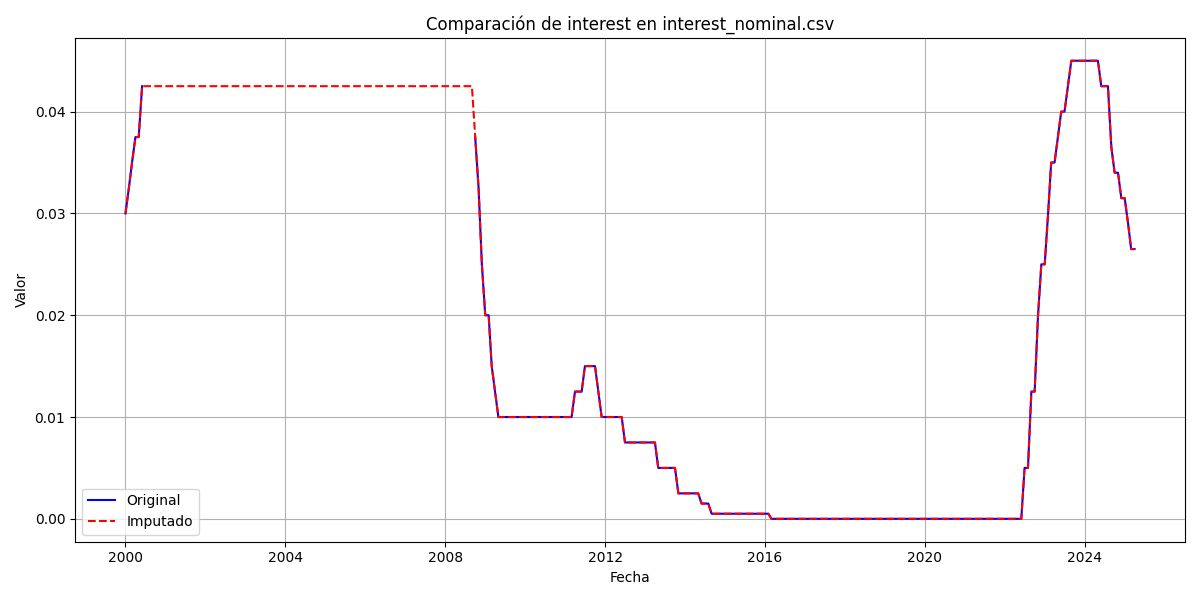

Mostrando: comparacion_interest_real.png


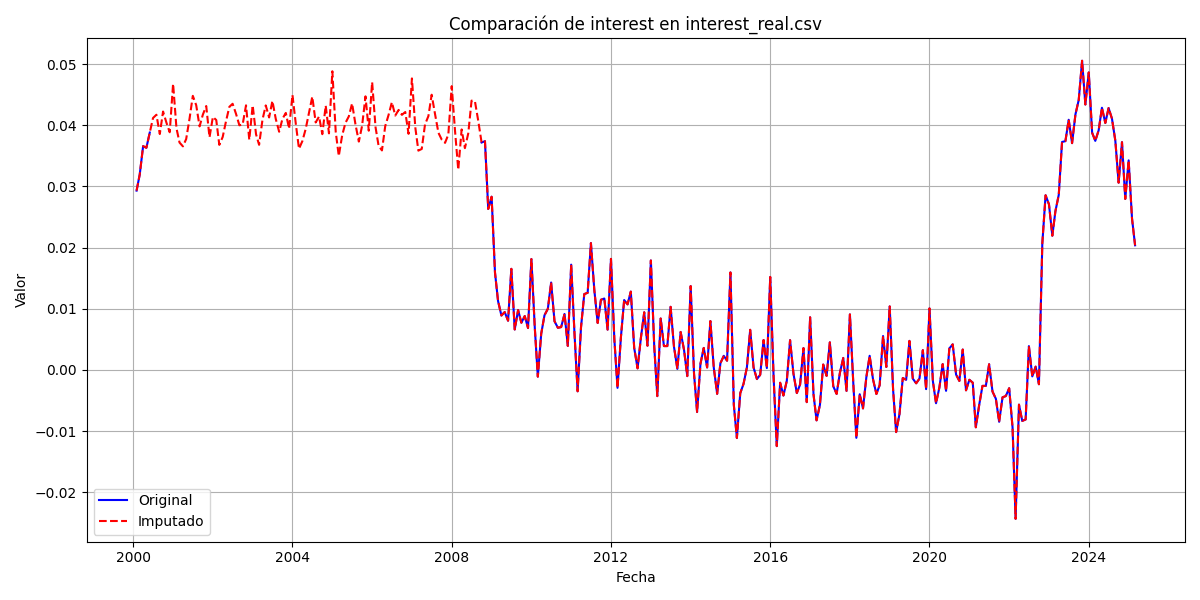

Mostrando: comparacion_mortgage_nominal.png


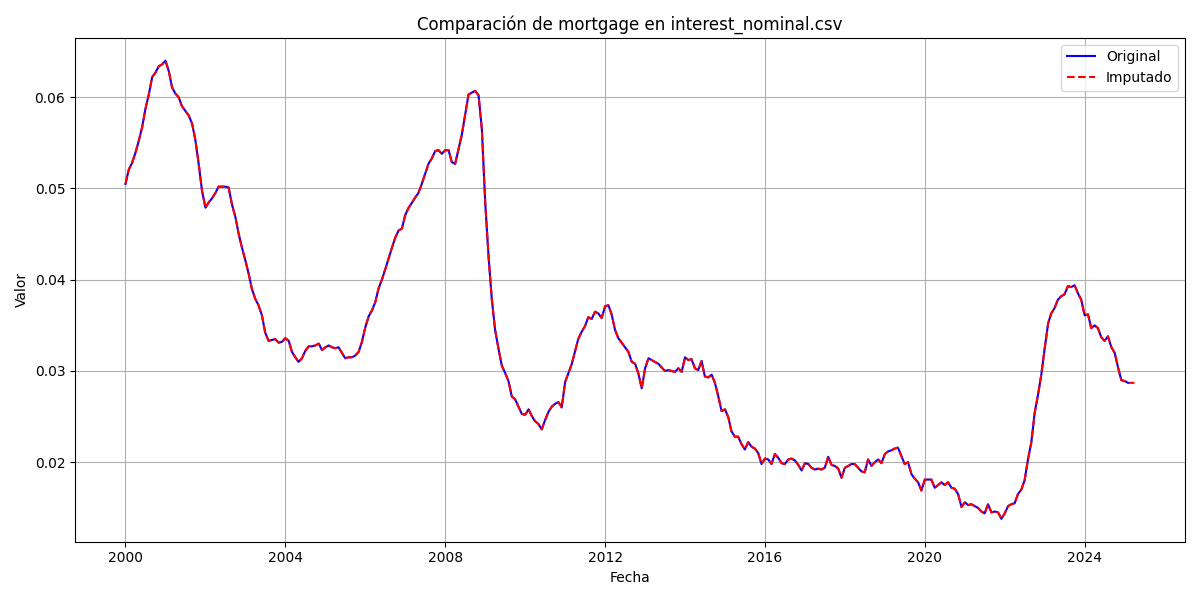

Mostrando: comparacion_mortgage_real.png


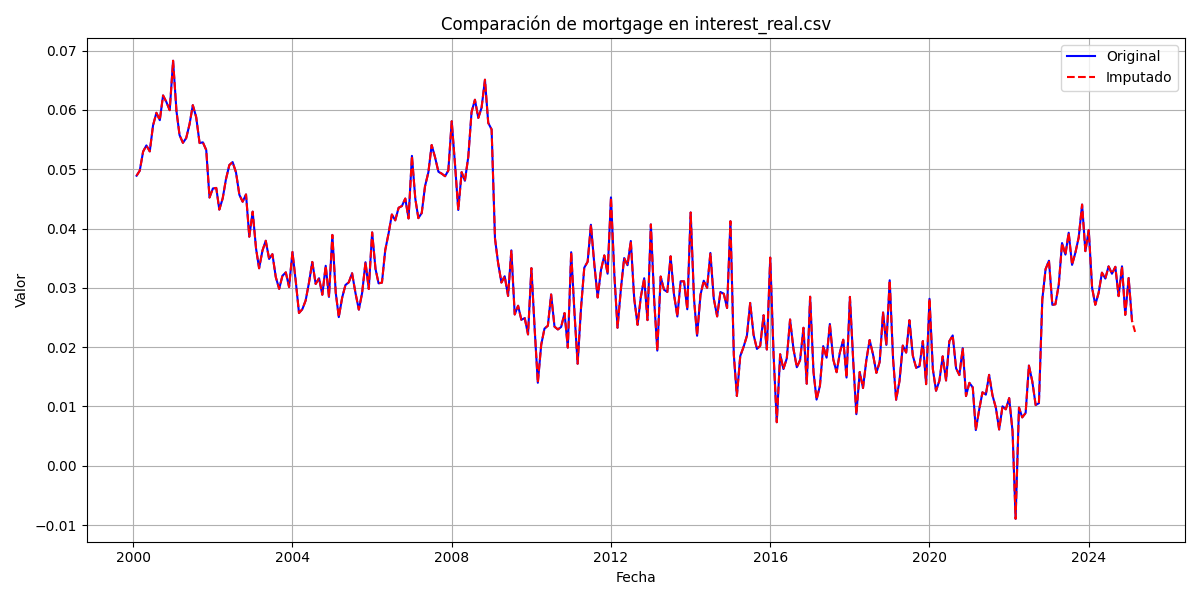

In [85]:
from IPython.display import Image, display
import os

def print_images_from_folder(folder_path):
    """
    Muestra todas las imágenes PNG de una carpeta en un notebook.
    """
    if not os.path.exists(folder_path):
        print(f"La carpeta '{folder_path}' no existe.")
        return

    archivos = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    if not archivos:
        print(f"No se encontraron imágenes en '{folder_path}'")
        return

    for archivo in archivos:
        ruta = os.path.join(folder_path, archivo)
        print(f"Mostrando: {archivo}")
        display(Image(filename=ruta))

print_images_from_folder('/content/visualizaciones')


### visualizaciones finales


Mostrando gráfica de: interest_fixed_imputado.csv


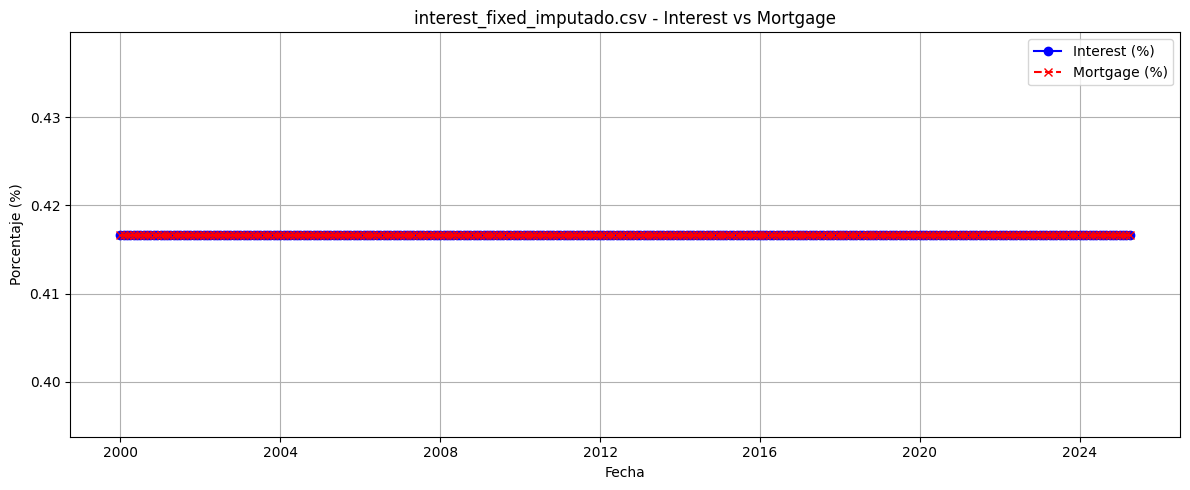


Mostrando gráfica de: interest_nominal_imputado.csv


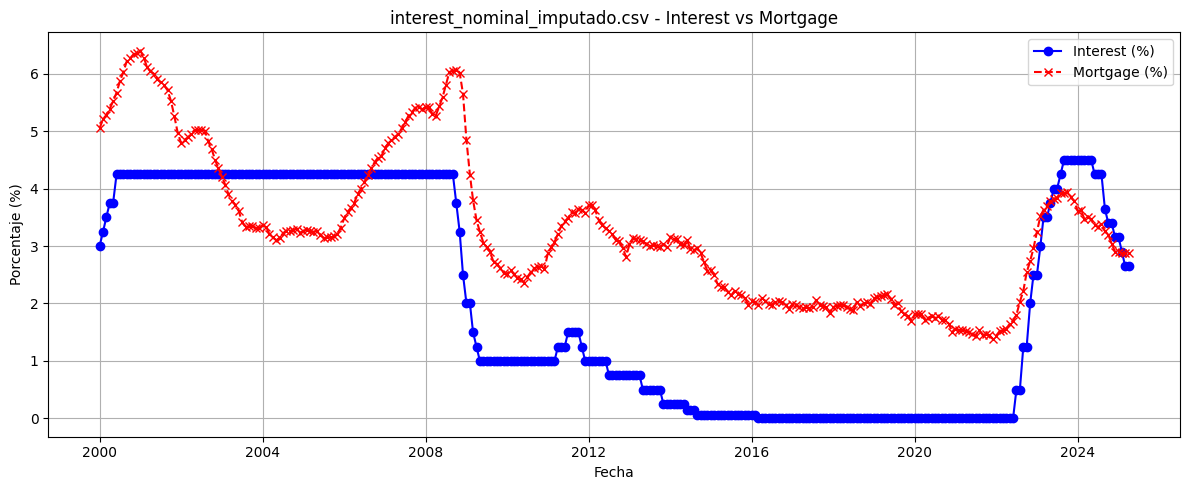


Mostrando gráfica de: interest_real_imputado.csv


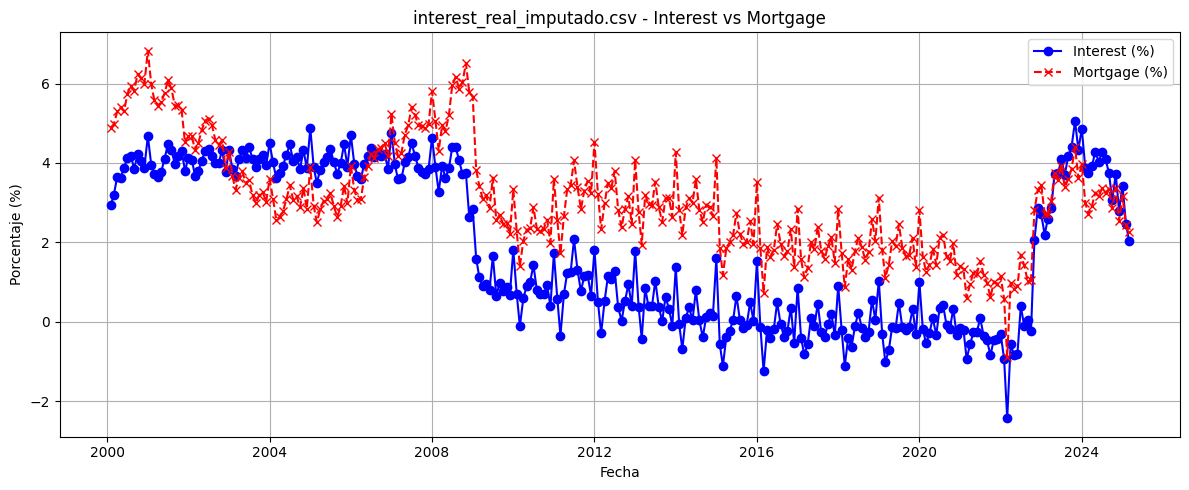

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os

def plot_interest_vs_mortgage(folder_path):
    """
    Carga los CSV de una carpeta y genera una gráfica comparando
    'interest' y 'mortgage' como porcentaje a lo largo del tiempo.
    """
    if not os.path.exists(folder_path):
        print(f"La carpeta '{folder_path}' no existe.")
        return

    archivos = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

    if not archivos:
        print(f"No se encontraron archivos CSV en '{folder_path}'")
        return

    for archivo in archivos:
        ruta = os.path.join(folder_path, archivo)
        print(f"\nMostrando gráfica de: {archivo}")
        try:
            df = pd.read_csv(ruta, sep=';')
            df['date'] = pd.to_datetime(df['date'], format='%Y-%m', errors='coerce')

            plt.figure(figsize=(12, 5))
            plt.plot(df['date'], df['interest'] * 100, label='Interest (%)', color='blue', marker='o')
            plt.plot(df['date'], df['mortgage'] * 100, label='Mortgage (%)', color='red', linestyle='--', marker='x')
            plt.title(f"{archivo} - Interest vs Mortgage")
            plt.xlabel("Fecha")
            plt.ylabel("Porcentaje (%)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error al procesar {archivo}: {e}")

plot_interest_vs_mortgage('/content/imputados')
